In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import seaborn as sb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('RESOURCES/diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [9]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


In [12]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [13]:
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Diabetes', 'HighBP', 'Stroke']

Presenting the countplots for categorical features
------------------------------Age------------------------------


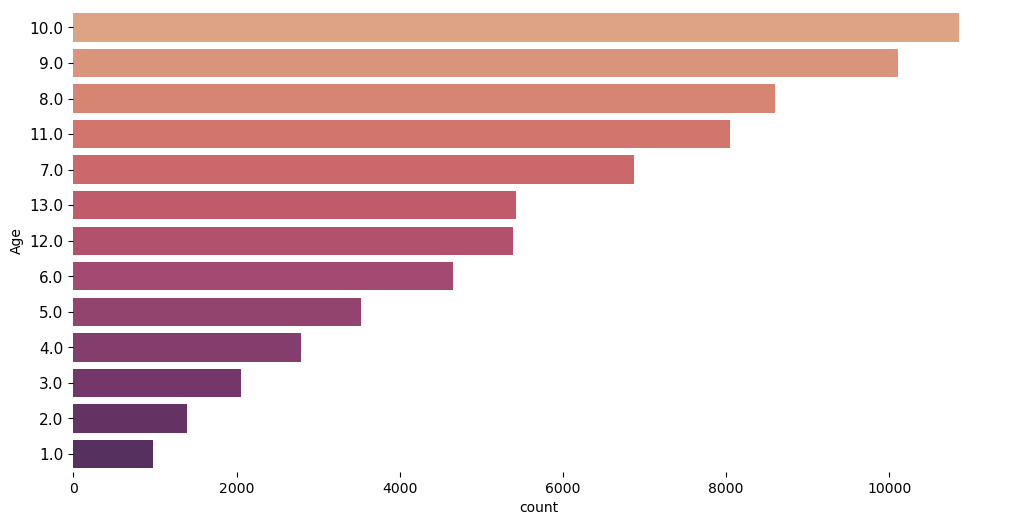

------------------------------Sex------------------------------


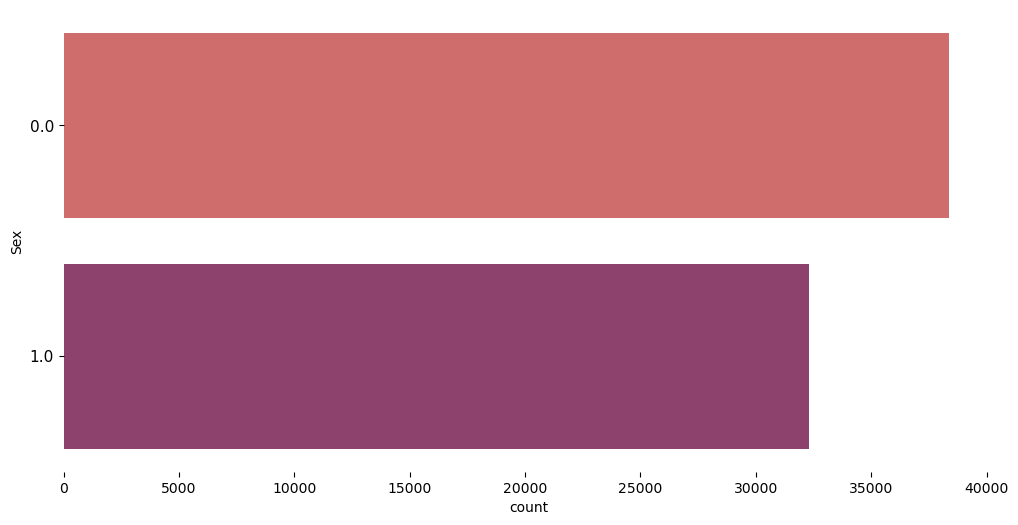

------------------------------HighChol------------------------------


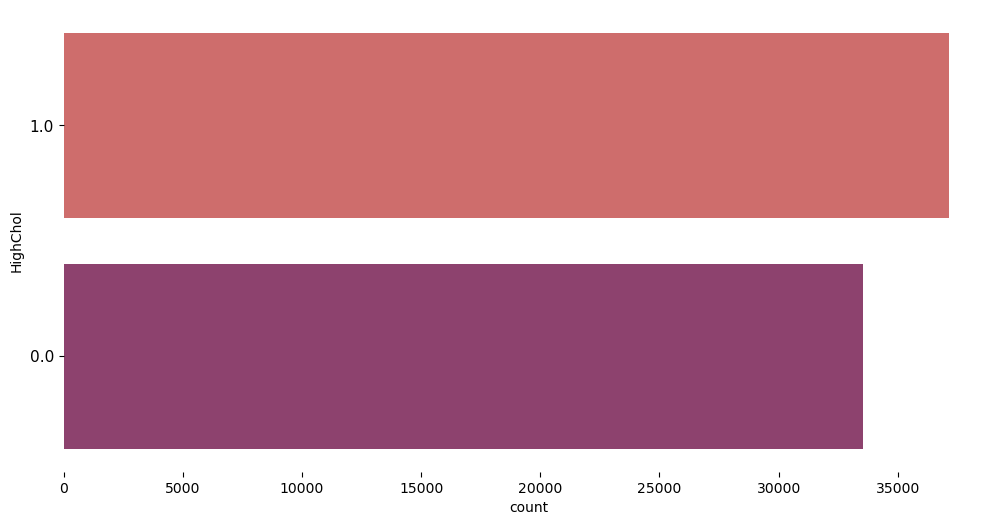

------------------------------CholCheck------------------------------


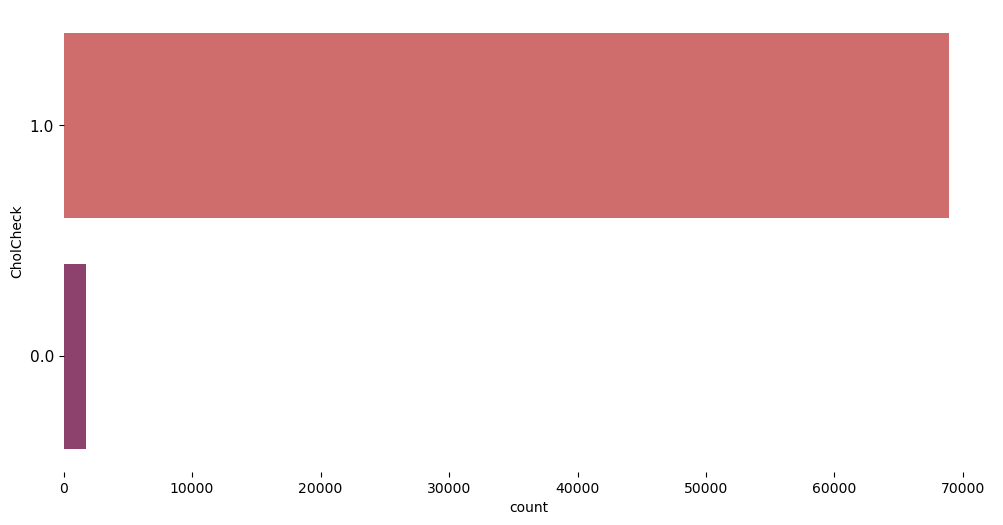

------------------------------Smoker------------------------------


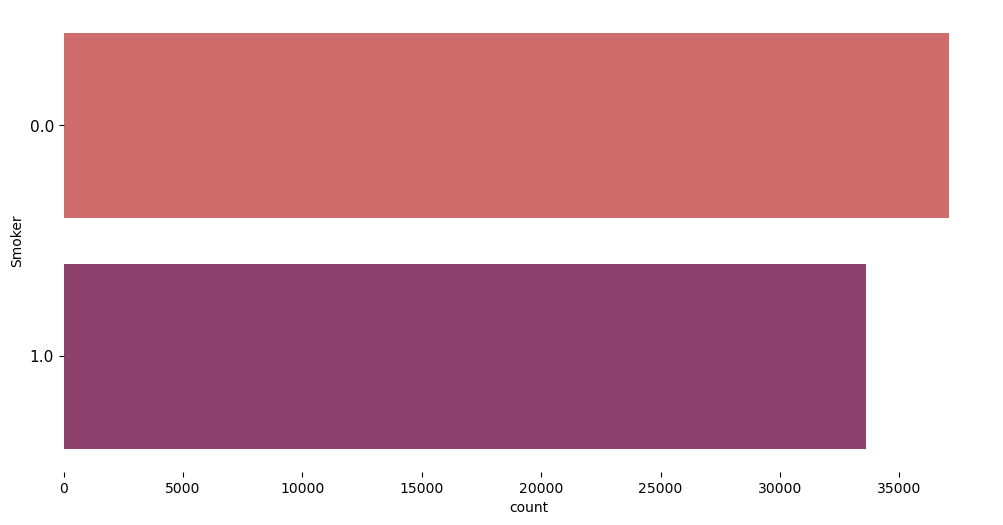

------------------------------HeartDiseaseorAttack------------------------------


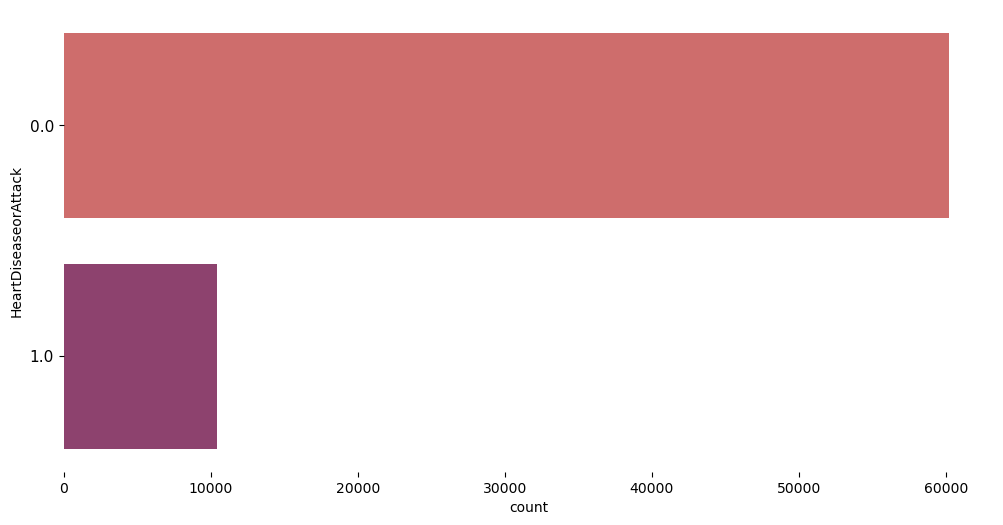

------------------------------PhysActivity------------------------------


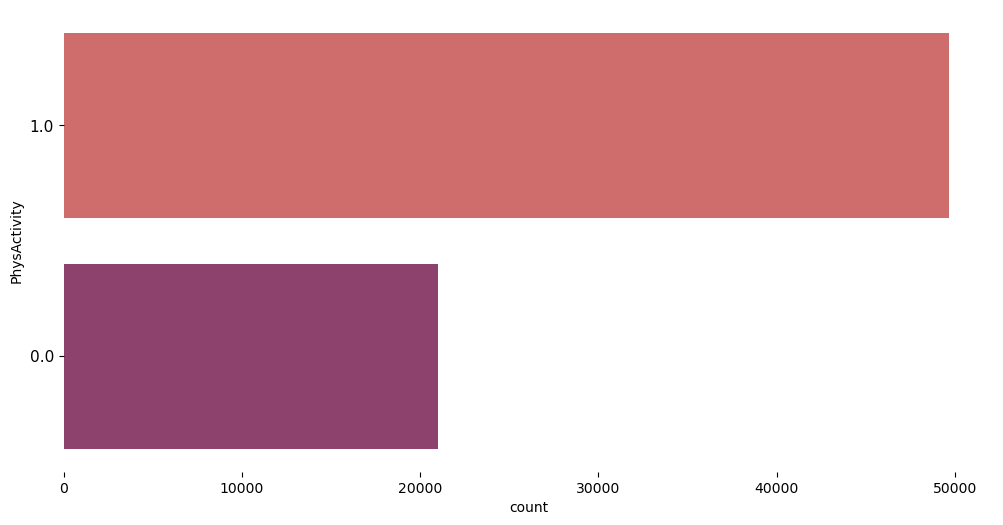

------------------------------Fruits------------------------------


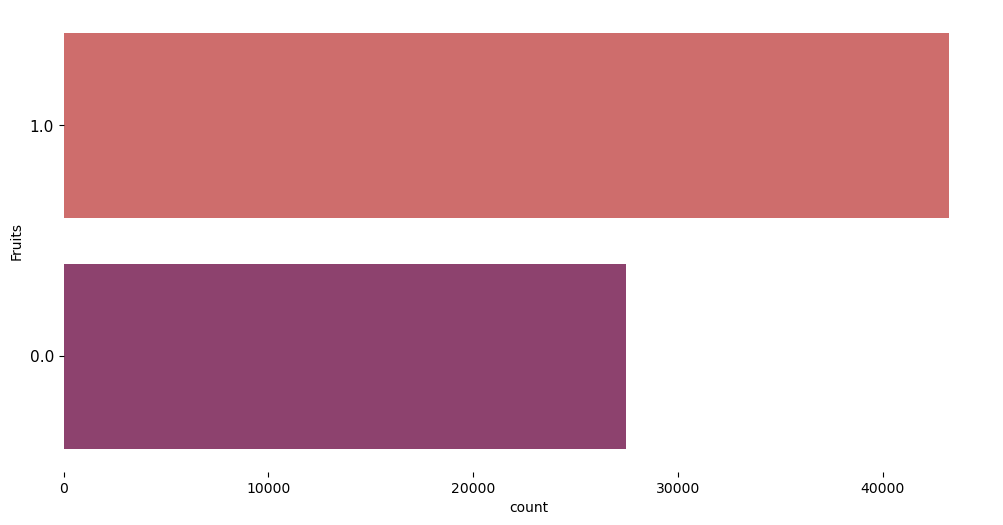

------------------------------Veggies------------------------------


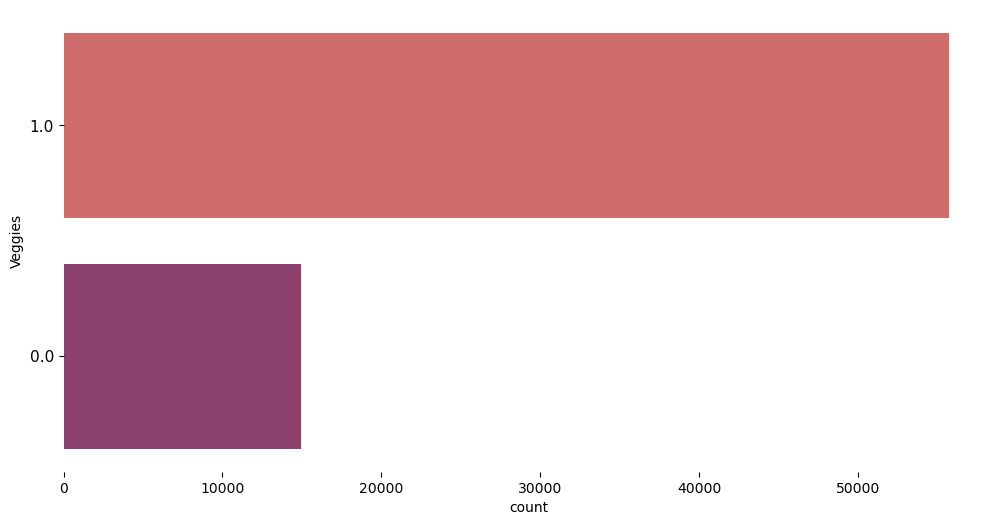

------------------------------HvyAlcoholConsump------------------------------


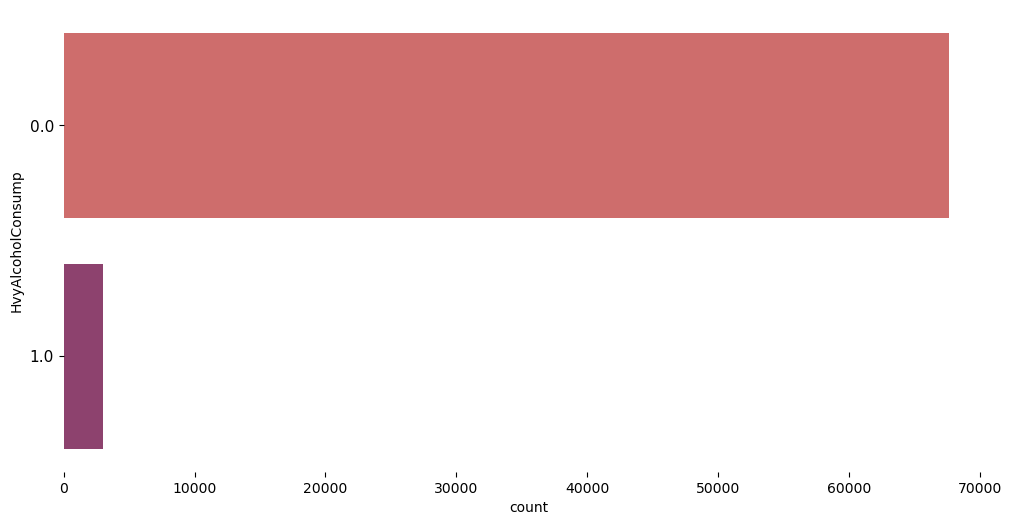

------------------------------GenHlth------------------------------


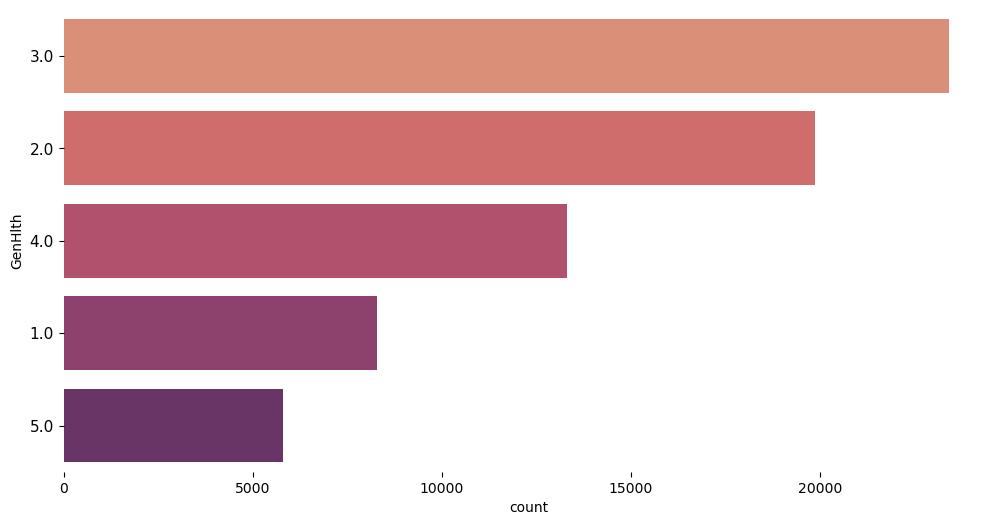

------------------------------DiffWalk------------------------------


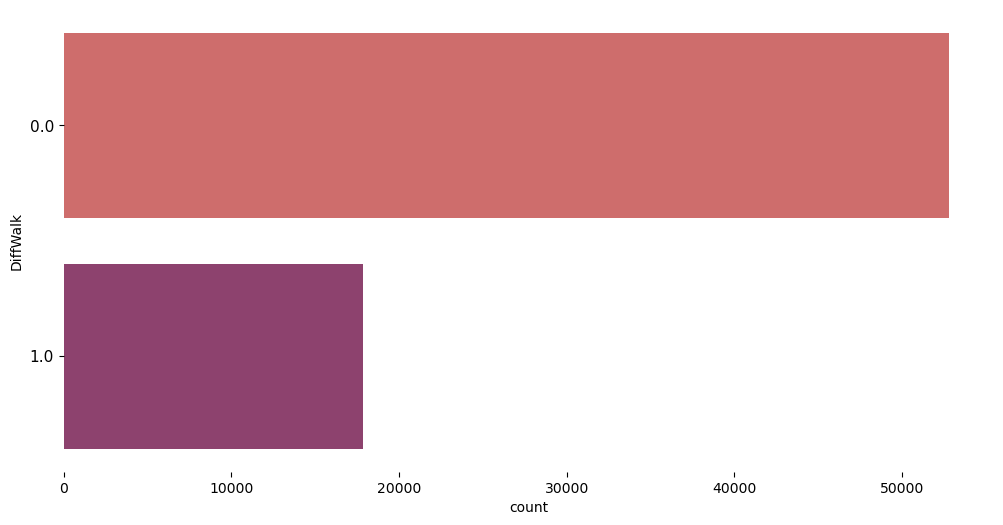

------------------------------Diabetes------------------------------


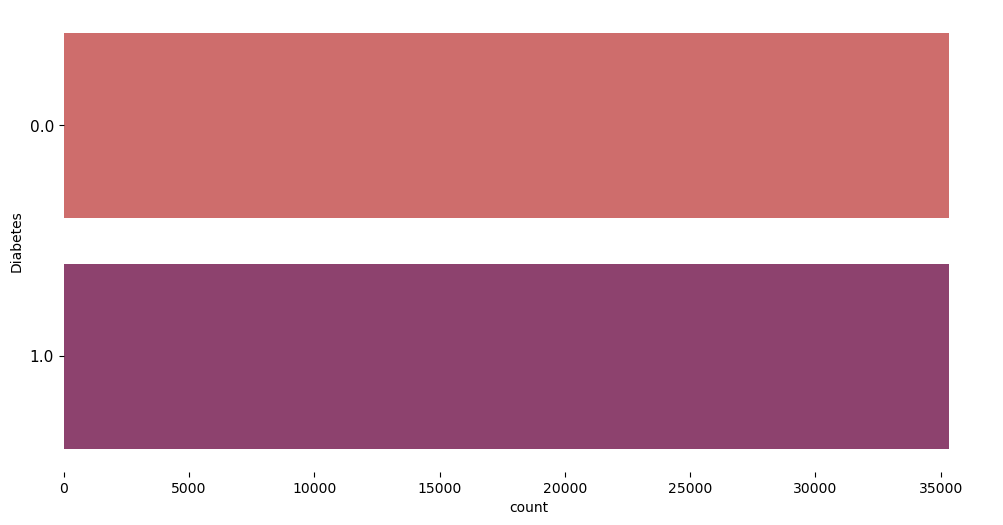

------------------------------HighBP------------------------------


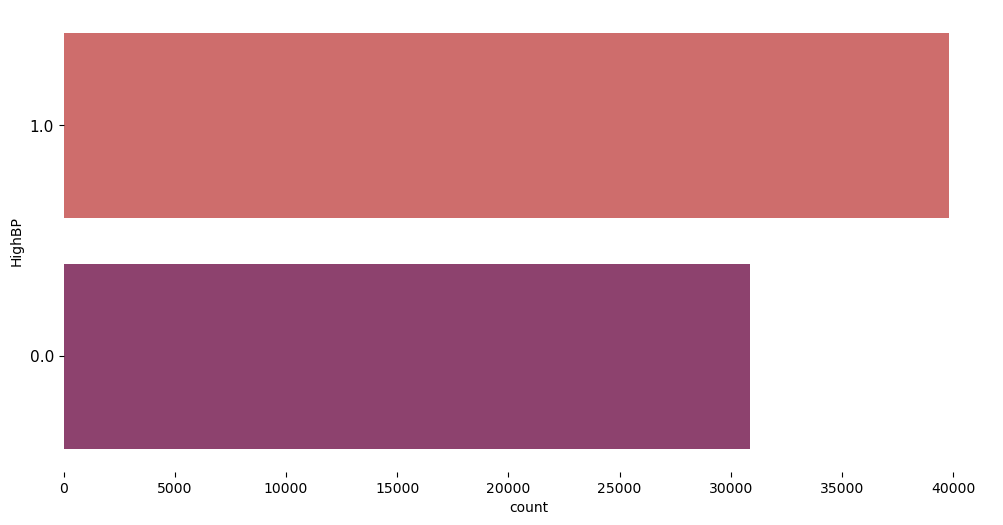

------------------------------Stroke------------------------------


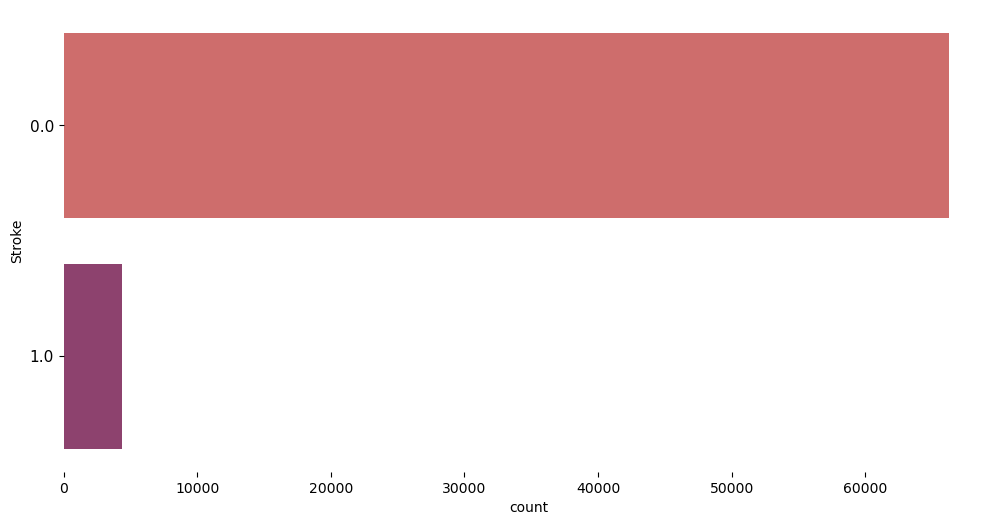

In [27]:
print("Presenting the countplots for categorical features")
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(12, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='flare')
  plt.ylabel(i)
  plt.yticks(fontsize=11)
  print(f'------------------------------{i}------------------------------')
  plt.box()
  plt.show()

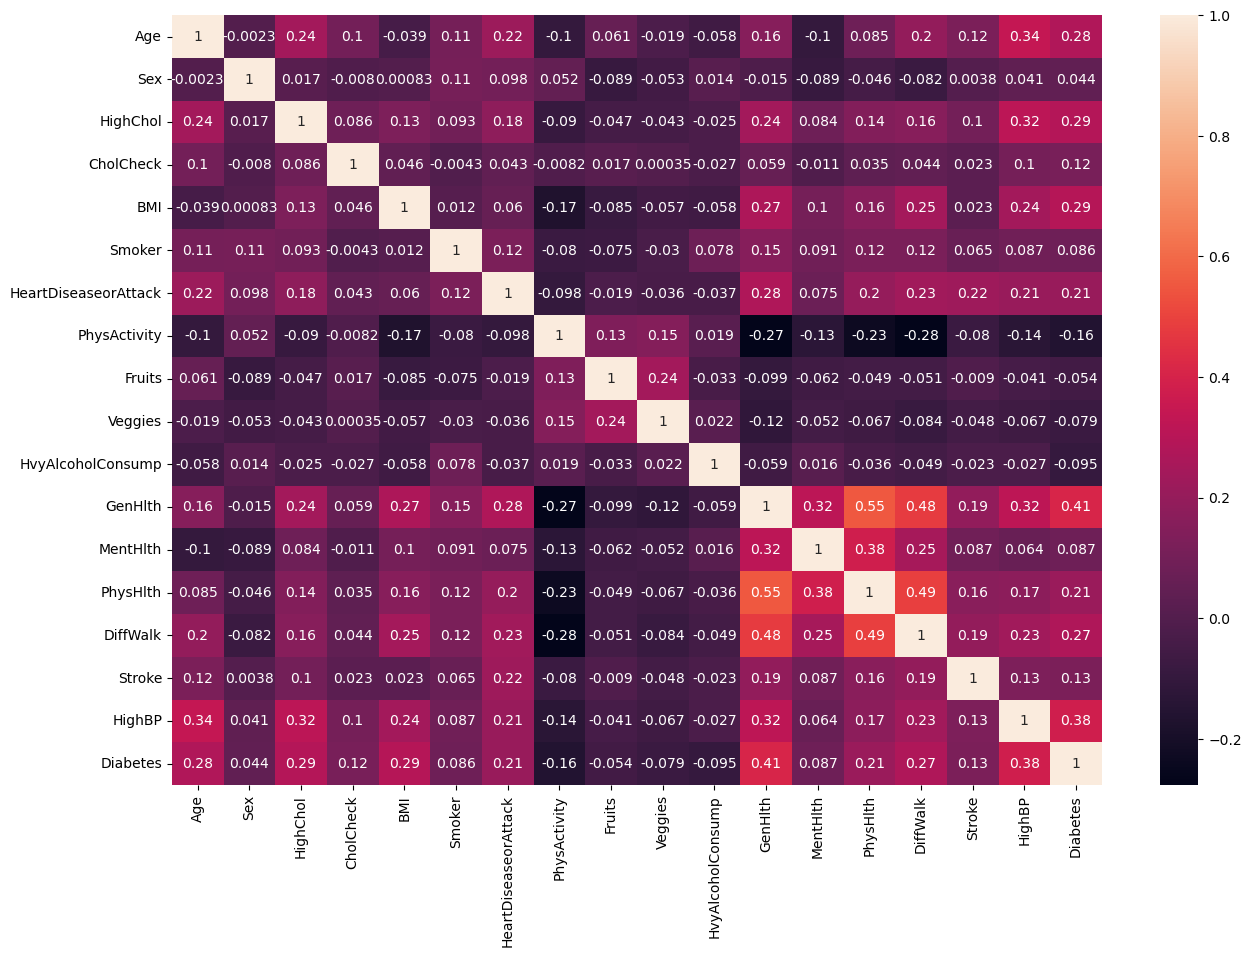

In [16]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
df.shape

(70692, 18)

In [17]:




# Separate the features and the target variable
X = df.drop('HighChol', axis=1)  # Features
y =df['Diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier using the training data
rf_classifier = rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)




Model Evalution

In [19]:
predictions = rf_classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [20]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [21]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7090,0
Actual 1,0,7049


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7090
         1.0       1.00      1.00      1.00      7049

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139



In [22]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_classifier.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True)

[(0.8396471737150238, 'Diabetes'),
 (0.04769021580047451, 'HighBP'),
 (0.046319239575251095, 'GenHlth'),
 (0.02118685423021662, 'BMI'),
 (0.015549632345670264, 'Age'),
 (0.011550202186644945, 'DiffWalk'),
 (0.005387039487280431, 'PhysHlth'),
 (0.004801504851579885, 'HeartDiseaseorAttack'),
 (0.0014656669866068357, 'MentHlth'),
 (0.0011868634207682542, 'PhysActivity'),
 (0.0010082779353535606, 'CholCheck'),
 (0.0009355695813882719, 'HvyAlcoholConsump'),
 (0.0007942714063841015, 'Stroke'),
 (0.0007773811614660301, 'Sex'),
 (0.000610119306380771, 'Smoker'),
 (0.000549043933166842, 'Fruits'),
 (0.0005409440763436973, 'Veggies')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

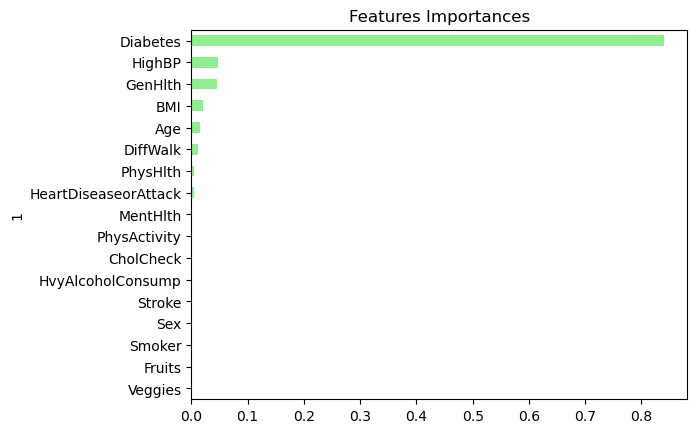

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [24]:

# Separate the features and the target variable
X = df.drop('Stroke', axis=1)  # Features
y = df['Diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier using the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Create the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7090
         1.0       1.00      1.00      1.00      7049

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139



In [25]:


# Separate the features and the target variable
X = df.drop('Stroke', axis=1)  # Features
y = df['Diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors

# Train the classifier using the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Create the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy: 0.9082679114505976
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      7090
         1.0       0.89      0.93      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139

